In [114]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from mpl_toolkits import mplot3d
from matplotlib import dates as date
import seaborn as sns; sns.set() 
plt.style.use("fivethirtyeight")

In [69]:
iris=load_iris()
X=iris.data
y=iris.target


In [107]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

def make_data(N,err=1.0,rseed=1):
    rng=np.random.RandomState(rseed)
    X=rng.rand(N,1)**2
    y=10-1/(X.ravel()+0.1)
    if err>0:
        y+=err*rng.randn(N)
    return (X,y)

X,y=make_data(40)

print(X.shape)
print(y.shape)

(40, 1)
(40,)


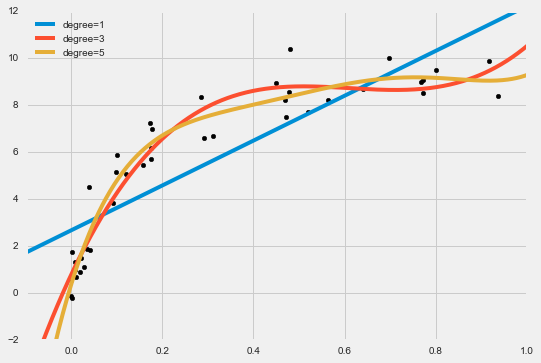

In [120]:
X_test=np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(X.ravel(),y,color='black')
axis=plt.axis()
for degree in [1,3,5]:
    y_test=PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label="degree={}".format(degree))

plt.xlim(-0.1,1)
plt.ylim(-2,12)
plt.legend(loc='best')

(0, 1)

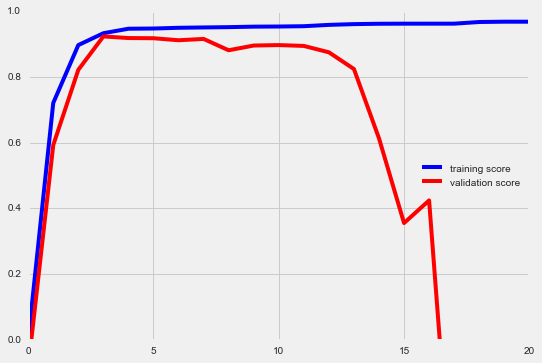

In [125]:
from sklearn.learning_curve import validation_curve
degree=np.arange(0,21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)


plt.plot(degree,np.median(train_score,1),color='blue',label='training score')
plt.plot(degree,np.median(val_score,1),color='red',label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)

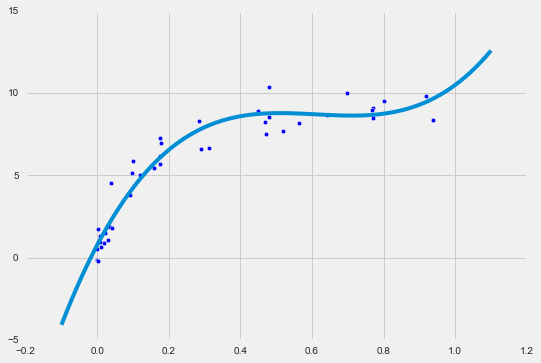

In [126]:
plt.scatter(X.ravel(),y)
y_model=PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test,y_model)